<a href="https://colab.research.google.com/github/khanfarabi/Zero_Shot_Classifier_Explainer/blob/main/Zero_Shot_K_MEANS_Agglomerative_cluster_Appliccation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def inst():
        !pip install sentence_transformers
        !pip install transformers
        !pip install datasets
        !pip install stop_words
inst()

     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 3.8 MB 34.0 MB/s 
     |████████████████████████████████| 1.2 MB 31.4 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 6.5 MB 64.6 MB/s 
     |████████████████████████████████| 596 kB 71.6 MB/s 
     |████████████████████████████████| 895 kB 68.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=27316290db84f08eb7c8a791da2419b9d3a6e7d4259c0c946458c44aace44450
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 312 kB 5.3 MB/s 
     |████████████████████████████████| 212 kB 78.8 MB/s 
     

In [2]:
# Data Preprocessing to retieve the texts with the multiple labels
from datasets import load_dataset

reuters= load_dataset('reuters21578', 'ModApte')
import re
import random

random.seed(1)

def clean(label):
    label = re.sub("([a-z])([A-Z])", "\\1 \\2", label)
    label = label.replace("_", " ")
    return label


def sample_test_data(texts,  labels, size):
    data = list(zip(texts, labels))
    data = [item for item in data if len(item[0]) > 0]
    #random.shuffle(data)
    texts, labels = zip(*data)
    return texts[:size], labels[:size], texts[size:], labels[size:]
reuters_train_texts, reuters_train_labels, _, _ = sample_test_data(reuters['train'], reuters['train']['topics'], 50000)
import numpy as np
import operator
import matplotlib.pyplot as plt
#from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
nltk.download('punkt')
import csv
import pandas as pd
txt=[]

import nltk
nltk.download('wordnet')
import nltk
from stop_words import get_stop_words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
stop_words.extend(nltk_words)
rttext_tag={}
label_class=[]
WORDS_ev={}
sintag={}
eid_maps={}
eid_mapm={}
rid=0
rd_txt={}
txt_rd={}
#
rttext_tags={}
label_classs=[]
WORDS_evs={}
sintags={}
eid_mapss={}
eid_mapms={}
rids=0
rd_txts={}
txt_rds={}

for hh in range(len(reuters_train_labels)):
  if len(reuters_train_labels[hh])>0 and len(reuters_train_texts[hh]['text'].split())>0:
                  zz=reuters_train_labels[hh]
                  #print("text"+"\n")
                  if len(zz)>1 and len(zz)<=3:
                          vcc=0
                          jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                          from nltk.tokenize import word_tokenize
                          tokens = word_tokenize(jj)
                          # convert to lower case
                          tokens = [w.lower() for w in tokens]
                          # remove punctuation from each word
                          import string
                          table = str.maketrans('', '', string.punctuation)
                          stripped = [w.translate(table) for w in tokens]
                          # remove remaining tokens that are not alphabetic
                          words = [word for word in stripped if word.isalpha()]
                          # filter out stop words
                          from nltk.corpus import stopwords
                          stop_words = set(stopwords.words('english'))
                          words = [w for w in words if not w in stop_words and len(w)>=3]
                          wrd=[]
                          sz=''
                          for k in words:
                              if vcc<150:
                                wrd.append(k)
                                vcc=vcc+1
                          #rttext_tag[wrd]=zz[0]
                          if len(wrd)>=10:
                              WORDS_ev[rid]=wrd
                              #rid=rid+1
                              for vv in wrd:
                                if vv!='reuter':
                                    sz=sz+vv+" "
                            #print(zz,sz)
                              for kk in zz:
                                if kk not in label_class:
                                    label_class.append(kk)
                              rttext_tag[sz]=zz
                              sintag[sz]=zz[0:1]
                              eid_maps[rid]=zz[0:1]
                              eid_mapm[rid]=zz
                              rd_txt[rid]=sz
                              txt_rd[sz]=rid
                              rid=rid+1
                          #print(reuters_train_texts[hh]['text'].split())
                          #txt.append(reuters_train_texts[hh]['text'])
                          #print("\n\n")
                  elif len(zz)==1:
                                        vcc=0
                                        jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                                        from nltk.tokenize import word_tokenize
                                        tokens = word_tokenize(jj)
                                        # convert to lower case
                                        tokens = [w.lower() for w in tokens]
                                        # remove punctuation from each word
                                        import string
                                        table = str.maketrans('', '', string.punctuation)
                                        stripped = [w.translate(table) for w in tokens]
                                        # remove remaining tokens that are not alphabetic
                                        words = [word for word in stripped if word.isalpha()]
                                        # filter out stop words
                                        from nltk.corpus import stopwords
                                        stop_words = set(stopwords.words('english'))
                                        words = [w for w in words if not w in stop_words and len(w)>=4]
                                        wrd=[]
                                        sz=''
                                        for k in words:
                                            if vcc<150:
                                                wrd.append(k)
                                                vcc=vcc+1
                                        #rttext_tag[wrd]=zz[0]
                                        if len(wrd)>=5:
                                            WORDS_evs[rid]=wrd
                                            #rid=rid+1
                                            for vv in wrd:
                                                if vv!='reuter':
                                                    sz=sz+vv+" "
                                            #print(zz,sz)
                                            for kk in zz:
                                                if kk not in label_classs:
                                                    label_classs.append(kk)
                                            rttext_tags[sz]=zz
                                            sintags[sz]=zz#[0:1]
                                            eid_mapss[rid]=zz#[0:1]
                                            eid_mapms[rid]=zz
                                            rd_txts[rid]=sz
                                            txt_rds[sz]=rid
                                            rids=rids+1




Downloading:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.15M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset reuters21578 downloaded and prepared to /root/.cache/huggingface/datasets/reuters21578/ModApte/1.0.0/98a2ad6a0242627562db83992f9625261854c40a88619322596153a5a16a206c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Unique Tag list
tagu=[]
stt=[]

for  sz in rttext_tag:
           s=''
           for vb in rttext_tag[sz]:
               #if vb not in stt:
                   s=str(vb)+" "+sz
                   if s not in stt:
                        stt.append(s)
ds=set(stt)
for kk in ds:
    tagu.append(kk)
print(len(tagu))
for tt in tagu:
    pass

2059


In [10]:
#Tag Clustering using Agglomerative and K-means Clustering  4.25 10 3.25 5 3.00

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np


embedder = SentenceTransformer('all-distilroberta-v1')#('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')
# Corpus with example sentences
corpus = tagu
corpus_embeddings = embedder.encode(corpus)
'''
#num_clusters = 10

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform Agglomerative clustering
clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=2.0) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment,dis = clustering_model.labels_,clustering_model.distances_
#print(dis)
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])
final_clut={}
for i, cluster in clustered_sentences.items():
    if len(cluster)>=4:
        final_clut[i]=cluster
    #print(cluster[0])

    #print("Cluster ", i+1)
    #print(cluster)
    #print("")

'''

#Tag Clustering K-mEans

# Normalize the embeddings to unit length

corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering

num_clusters=10
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])
#
final_clut={}
for i, cluster in enumerate(clustered_sentences):
    #pass
    #print("Cluster ", i+1)
    #print(cluster)
    #print("")
    final_clut[i]=cluster




In [11]:
final_clut1={}
for tt in final_clut:
    ghh=[]
    for kk in final_clut[tt]:
        hh=kk.split()
        #print(tt,hh[0])
        ghh.append(hh[0])#(kk)#(hh[0])
    if len(ghh)>0:
        final_clut1[tt]=ghh
print(len(final_clut1))

10


In [37]:
# Re-assigning the labels 

import math
import sys
import random


final_cluh={}
rttext_tagh1={}
rttext_tagh={}
cc=0
mptxt={}
rttag={}
allid=[]
truhh=[]
vbb=[]

for vv in final_clut1:
    bbb=[]
    bbb1=[]
    if len(final_clut1[vv])%2!=0:
            lbb=random.choice(final_clut1[vv])
            bbb.append(final_clut1[vv][math.ceil(len(final_clut[vv])/2)-1])
            bbb1.append(lbb)
            final_cluh[vv]=bbb#bbb#final_clu[vv][math.ceil(len(final_clu[vv])/2)-1]
    elif len(final_clut[vv])%2==0:
        lbb1=random.choice(final_clut1[vv])
        bbb1.append(lbb1)
        bbb.append(final_clut1[vv][math.ceil(len(final_clut[vv])/2)])
        final_cluh[vv]=bbb#bbb#final_clu[vv][math.ceil(len(final_clu[vv])/2)]


for kk in final_clut1:
    for vz in rttext_tag:
        ggh=[]
        for zx in rttext_tag[vz]:
            if zx in final_clut1[kk]:
                #if zx not in ggh:
                        ggh.append(zx)#(final_cluh[kk][0])#(final_clut1[kk][0])#(zx)#(final_clut1[kk][0])#(final_cluh[kk][0])
                        #print(vz,zx)
                        if cc<100:
                            rttag[vz]=ggh
                            cc=cc+1
                        rttext_tagh1[vz]=ggh
                        mptxt[txt_rd[vz]]=ggh
                        #cc=cc+1
                        #print("\n")
                        break

'''
@RANDOM SELECTION

'''
#sys.exit()

###########
'''
@RANDOM SELECTION

'''

for kk in rttext_tagh1:
    if txt_rd[str(kk)] not in allid:
        allid.append(txt_rd[str(kk)])


for jj in range(0,4111):
    bb=random.choice(allid)
    rttext_tagh[rd_txt[bb]]=rttext_tagh1[rd_txt[bb]]


for tt in rttext_tagh:
    for kkk in rttext_tagh[tt]:
        if kkk not in  vbb:
            vbb.append(kkk)

ss=set(vbb)

for vv in ss:
    truhh.append( vv)

print(len(rttext_tagh),len(truhh))




926 45


In [32]:
# Original Random Process (Without label pre-processing)
import random

allid=[]
rttext_tagh={}
cc=0
truhh=[]
vbb=[]

for kk in rttext_tag:
    if txt_rd[str(kk)] not in allid:
        allid.append(txt_rd[str(kk)])



for jj in range(0,6011):
    bb=random.choice(allid)
    rttext_tagh[rd_txt[bb]]=rttext_tag[rd_txt[bb]]


for tt in rttext_tagh:
    for kkk in rttext_tagh[tt]:
        if kkk not in  vbb:
            vbb.append(kkk)
ss=set(vbb)
for vv in ss:
    truhh.append( vv)

print(len(rttext_tagh),len(truhh))


943 90


In [ ]:
#Accuracy Computation

#multi tag

from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
import operator
import matplotlib.pyplot as plt
from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
import operator
#from transformers_interpret import ZeroShotClassificationExplainer
zero_shot_classifier = pipeline("zero-shot-classification")#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
#tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
#model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
#zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)

cn=0
txt_lbp={}
ocl_di={}
pred_l={}
ocl_dia={}
pred_lnk={}
ocl_dnk={}
pred_tk={}
ocl_tk={}
all_txt_label_score={}
all_txt_label_rank={}

# Zero-shot Classification
def review_explain(text):
        result = zero_shot_classifier(sequences =text,candidate_labels =truhh ,multi_label=True)
        
        return result['labels'],result['scores']






for tt in rttext_tagh:
      mpd={}
      nlb=[]
      mpd_nk={}
      mpd_tk={}
      nlb_tk=[]
      nlb_nk=[]
      rn={}
      rsc={}
      clas,score= review_explain(tt)
   
      for bb in range(0,len(clas)):
          rsc[clas[bb]]=score[bb]
      for bb in range(0,len(clas)):
          rn[clas[bb]]=bb+1
      all_txt_label_score[tt]=rsc
      all_txt_label_rank[tt]=rn
      for k1 in rttext_tagh[tt]:
            for t3 in range(0,len(clas)):
                if str(clas[t3])==str(k1):
                    mpd[k1]=score[t3]
      for k1 in rttext_tagh[tt]:
            for t3 in range(0,len(clas)):
                if str(clas[t3])!=str(k1):
                    if score[t3]>0.5:
                        mpd_nk[k1]=score[t3]
      for k1 in rttext_tagh[tt]:
            for t3 in range(0,len(clas)):
                if str(clas[t3])==str(k1):
                    if score[t3]>0.5:
                        mpd_tk[k1]=score[t3]
      
      dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
      dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
      dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
      
      for zz in dd:
          nlb.append(zz[0])
      for zz1 in dd1:
          nlb_nk.append(zz1[0])
      for zz2 in dd2:
          nlb_tk.append(zz2[0])
      
      pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
      pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
      ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
      ocl_dia[tt]=nlb#ranked list of the original label
      

      txt_lbp[tt]=clas[0:10]
      pred_l[tt]=clas
      
     







'''
Comparing average rank of the predicted original labels with that of it ideal rank positon
Coounting the number of non-original labels that have higher probability scores than that of original labels per text

'''
# average rank
ccc=0
KK=3 # number of top predicted non-original labels

per_txt_ori_rank_cmp={}
per_txt_ori_score_avg={}
per_txt_nonori_rank_cmp={}
per_txt_nonori_pred_rank_avg={}
per_txt_nonori_ori_rank_avg={}
per_txt_nonori_score_avg={}
per_txt_ori_pred_rank_avg={}
per_txt_ori_ori_rank_avg={}
per_txt_nonori_top_n={}


for v in all_txt_label_score:
  if v in rttext_tagh:
    orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
    s=0
    sc=0
    cz=0
    nr=[]
    sno=0
    snosc=0
    for kz in all_txt_label_rank[v]:
        if kz not in rttext_tagh[v]:
            if cz<KK:
                     if kz not in nr:
                            nr.append(kz)
                            #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                            sno=sno+float(all_txt_label_rank[v][kz])
                            snosc=snosc+float(all_txt_label_score[v][kz])
                            cz=cz+1
    #print("\n")
    per_txt_nonori_top_n[v]=nr
    per_txt_nonori_rank_cmp[v]=sno/KK
    per_txt_nonori_score_avg[v]=snosc/KK

    for kz in all_txt_label_rank[v]:
        if kz in rttext_tagh[v]:
            s=s+float(all_txt_label_rank[v][kz])
            sc=sc+float(all_txt_label_score[v][kz])
    prn=s/len(rttext_tagh[v])
    per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
    per_txt_ori_pred_rank_avg[v]=prn
    per_txt_ori_ori_rank_avg[v]=orn
   # print(prn)
    dif=abs(prn-orn)
    per_txt_ori_rank_cmp[v]=dif
    if dif<=0.0:
        ccc=ccc+1
print("Number of texts where the position of the original labels preserved after prediction")
print(ccc)
print("Percentage of texts where the position of the original labels preserved after prediction")
print(ccc/len(txt_lbp))


# average scores

vvv=0
for jj in per_txt_ori_score_avg:
    if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                vvv=vvv+1

print("Number of non-original labels have higher prediction acores than original labels after prediction")
               
print(vvv)

'''
Accuracy for the clustered labels
'''
#accuracy of multi-level classification with k-means clustering
def topps(n):
            cc=0
            vb1=0
            for tt in txt_lbp:
                    #if vb1 < 1000:
                            #vb1=vb1+1 
                            try:
                                for vb in txt_lbp[tt][0:n]:
                                        #print(rttext_tagh[tt][0],vb)
                                        if vb in rttext_tagh[tt][0:n]:
                                        #if str(vb) ==str(rttext_tagh[tt][0]):
                                            cc=cc+1
                                            break
                                        else:
                                            continue

                            except:
                                continue
                            
            #txt_lbp
            print("Top_"+str(n)+ " Prediction Score: ")
            print(cc/len(txt_lbp))
top=3
for zz in range(1,top+1):
    topps(zz)




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [ ]:
len(rttext_tagh),len(truhh)

(189, 2)

In [ ]:
With label clustering . here 5 cluster of labels for 2 unique labels  with 182 texts
Number of texts where the position of the original labels preserved after prediction
123
Percentage of texts where the position of the original labels preserved after prediction
0.6758241758241759
Number of non-original labels have higher prediction acores than original labels after prediction
40
Top_1 Prediction Score: 
0.6758241758241759
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


With label clustering . here 25 cluster of labels for 6 unique labels  with 187 texts
Number of texts where the position of the original labels preserved after prediction
86
Percentage of texts where the position of the original labels preserved after prediction
0.45989304812834225
Number of non-original labels have higher prediction acores than original labels after prediction
70
Top_1 Prediction Score: 
0.45989304812834225
Top_2 Prediction Score: 
0.6951871657754011
Top_3 Prediction Score: 
0.7379679144385026








'''







With label clustering . here 5 cluster of labels for 3 unique labels  with 100 texts


Number of texts where the position of the original labels preserved after prediction
63
Percentage of texts where the position of the original labels preserved after prediction
0.5833333333333334
Number of non-original labels have higher prediction acores than original labels after prediction
33
Top_1 Prediction Score: 
0.5833333333333334
Top_2 Prediction Score: 
0.7314814814814815
Top_3 Prediction Score: 
1.0

With label clustering . here 5 cluster of labels for 2 unique labels  with 100 texts
Number of texts where the position of the original labels preserved after prediction
75
Percentage of texts where the position of the original labels preserved after prediction
0.7281553398058253
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.7281553398058253
Top_2 Prediction Score: 
1.0


Without label clustering .  for 37 unique labels  with 100 texts
Number of texts where the position of the original labels preserved after prediction
23
Percentage of texts where the position of the original labels preserved after prediction
0.22115384615384615
Number of non-original labels have higher prediction acores than original labels after prediction
60
Top_1 Prediction Score: 
0.25961538461538464
Top_2 Prediction Score: 
0.7692307692307693
Top_3 Prediction Score: 
0.8173076923076923


'''

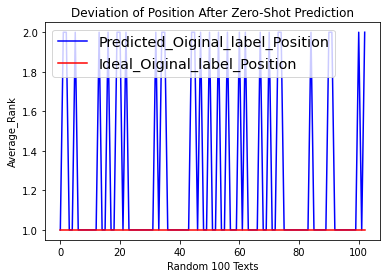

<Figure size 432x288 with 0 Axes>

In [ ]:
# Ploting the figures

import matplotlib.pyplot as plt
nri=[]
ori=[]
for jj in per_txt_ori_score_avg:
     nri.append(per_txt_ori_pred_rank_avg[jj])
     ori.append(per_txt_ori_ori_rank_avg[jj])

Geb_b30 = nri
years_b30 = range(0,len(nri))
Geb_a30 = ori
years_a30 = range(0,len(ori))

fig, ax = plt.subplots()
ax.plot(years_b30, Geb_b30, label='Predicted_Oiginal_label_Position', color='blue')
ax.plot(years_a30, Geb_a30, label='Ideal_Oiginal_label_Position', color = 'red')
legend = ax.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Random 100 Texts')
plt.ylabel('Average_Rank')
plt.title('Deviation of Position After Zero-Shot Prediction')
plt.show()
plt.savefig("Deviation of Position.pdf")

In [ ]:
# Drawong

# Rank



# Score
nri=[]
ori=[]
for jj in per_txt_ori_score_avg:
     #print(per_txt_ori_ori_rank_avg[jj],per_txt_ori_pred_rank_avg[jj])
     nri.append(per_txt_nonori_score_avg[jj])
     ori.append(per_txt_ori_score_avg[jj])
import matplotlib.pyplot as plt

Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
years_b30 = range(0,len(nri))
Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
years_a30 = range(0,len(ori))

fig, ax = plt.subplots()
ax.plot(years_b30, Geb_b30, label='Non-original-label', color='blue')
ax.plot(years_a30, Geb_a30, label='Original-label', color = 'red')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Random_based 100 Texts')
plt.ylabel('Average_Score')
plt.title('Comparison of the Original-labels and Non-original-labels Regarding Average Probability Scores')
plt.show()
plt.savefig("Average_Score_Random_100_Texts_With 14 cluster of tags.pdf")





In [ ]:
# Text Clustering
sente=[]
mp_t={}
for  sz in rttext_tagh1:
           # print(rttext_tagh1[sz])
            sente.append(sz)
            #mp_t[sz]=vv

In [ ]:
len(sente)

1079

In [ ]:

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

embedder = SentenceTransformer('all-distilroberta-v1')#('all-MiniLM-L12-v2')

# Corpus with example sentences
corpus = sente
corpus_embeddings = embedder.encode(corpus)
num_clusters = 10
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform Agglomerative clustering
clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=2.50) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment,dis = clustering_model.labels_,clustering_model.distances_
#print(dis)
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])
final_clu={}
for i, cluster in clustered_sentences.items():
    if len(cluster)>=30:
            final_clu[i]=cluster
   # print("Cluster ", i+1)
    #print(cluster)
    #print("")
print(len(final_clu))
'''
# Perform kmean clustering
num_clusters =10
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])
#
final_clu={}
for i, cluster in enumerate(clustered_sentences):
    
    print("Cluster ", i+1)
    print(cluster)
    print("")
    final_clu[i]=cluster
'''


16


'\n# Perform kmean clustering\nnum_clusters =10\nclustering_model = KMeans(n_clusters=num_clusters)\nclustering_model.fit(corpus_embeddings)\ncluster_assignment = clustering_model.labels_\n\nclustered_sentences = [[] for i in range(num_clusters)]\nfor sentence_id, cluster_id in enumerate(cluster_assignment):\n    clustered_sentences[cluster_id].append(corpus[sentence_id])\n#\nfinal_clu={}\nfor i, cluster in enumerate(clustered_sentences):\n    \n    print("Cluster ", i+1)\n    print(cluster)\n    print("")\n    final_clu[i]=cluster\n'

In [ ]:
#bert based clustering mapping
'''
rd_txt[rid]=sz
txt_rd[sz]=rid
'''
import sys
final_clu1={}
gg=[]
for zz in final_clu:
        gh=[]
        gg.append(zz)
        for hh in final_clu[zz]:
              if txt_rd[hh] not in gh:
                  gh.append(txt_rd[hh])
        final_clu1[zz]=gh

rttext_tagh={}
import random
kk=random.choice(gg)
print("cluster number: "+str(kk))
vz=0
for bb in final_clu1[kk]:
     if rd_txt[bb]  in rttext_tagh1:
         #print(rttext_tag[rd_txt[bb]])
         #if vz<100:
                rttext_tagh[rd_txt[bb]]=rttext_tagh1[rd_txt[bb]]
                vz=vz+1
print(len(rttext_tagh))

truhh=[]
ss=[]

for k in rttext_tagh:
    for jj in rttext_tagh[k]:
        if jj not in ss:
            ss.append(jj)
s=set(ss)
for k in s:
    truhh.append(k)
print(len(truhh),len(rttext_tagh))

cluster number: 5
41
3 41


In [ ]:
# per cluster top1 accuracy
def zeroshot_cluster():
        import sys
        final_clu1={}
        gg=[]   
        #rttext_tagu={}
        for zz in final_clu:
                
                gh=[]
                gg.append(zz)
                for hh in final_clu[zz]:
                    if txt_rd[hh] not in gh:
                        gh.append(txt_rd[hh])
                final_clu1[zz]=gh
        print("cluster number")
        print(len(final_clu1))
        for kk in final_clu1:
                print("cluster number: "+str(kk))
                vz=0
                rttext_tagu={}
                for bb in final_clu1[kk]:
                    if rd_txt[bb]  in rttext_tagh1:
                        #print(rttext_tag[rd_txt[bb]])
                        #if vz<100:
                                rttext_tagu[rd_txt[bb]]=rttext_tagh1[rd_txt[bb]]
                #number of labels per model
                tru=[]
                ss=[]
                for k in rttext_tagu:
                    for jj in rttext_tagu[k]:
                        if jj not in ss:
                            ss.append(jj)
                s=set(ss)
                for k in s:
                    tru.append(k)
                print(len(tru),len(rttext_tagu))
                # new check with the clustered texts

                #multi tag
                #from AltZSC import ZeroShotTextClassification
                #zstc = ZeroShotTextClassification()
                from transformers import AutoModelForSequenceClassification, AutoTokenizer
                import numpy as np
                import operator
                import matplotlib.pyplot as plt
                from transformers import pipeline
                from pylab import rcParams
                import sys 
                import nltk
                import re
                #from transformers_interpret import ZeroShotClassificationExplainer
                zero_shot_classifier = pipeline("zero-shot-classification")#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                vv4=[]
                for k in  rttext_tag:
                    for bb in  rttext_tag[k]:
                        if bb not in vv4:
                            vv4.append(bb)

                ss=set(vv4)#(label_class)
                tr=[]

                for k in ss:
                    tr.append(k)
                def review_explain(text):
                        result = zero_shot_classifier(sequences =text,candidate_labels=tru,multi_label=False)
                        
                        return result['labels'],result['scores']
                        
                        #preds = zstc(text=text,candidate_labels=tru,)
                            
                        #print(list(preds['labels']),list(preds['scores']))
                        #return list(preds['labels']),list(preds['scores'])
                    
            
                    
                #class,score= review_explain(text)

                cn=0
                txt_lbp={}
                ocl_di={}
                pred_l={}
                ocl_dia={}
                pred_lnk={}
                ocl_dnk={}
                pred_tk={}
                ocl_tk={}
                all_txt_label_score={}
                all_txt_label_rank={}
                for tt in rttext_tagu:
                #print(tt,rttext_tag[tt])
                #print("\n\n")
                 #if cn<len(rttext_tagu):
                    mpd={}
                    nlb=[]
                    mpd_nk={}
                    mpd_tk={}
                    nlb_tk=[]
                    nlb_nk=[]
                    rn={}
                    rsc={}
                    #try:
                    clas,score= review_explain(tt)
                    #except:
                        #continue 
                    #print(score)
                    for bb in range(0,len(clas)):
                        rsc[clas[bb]]=score[bb]
                    for bb in range(0,len(clas)):
                        rn[clas[bb]]=bb+1
                    all_txt_label_score[tt]=rsc
                    all_txt_label_rank[tt]=rn


                    for k1 in rttext_tagu[tt]:
                            for t3 in range(0,len(clas)):
                                if str(clas[t3])==str(k1):
                                    mpd[k1]=score[t3]
                    for k1 in rttext_tagu[tt]:
                            for t3 in range(0,len(clas)):
                                if str(clas[t3])!=str(k1):
                                    if score[t3]>0.5:
                                        mpd_nk[k1]=score[t3]
                    for k1 in rttext_tagu[tt]:
                            for t3 in range(0,len(clas)):
                                if str(clas[t3])==str(k1):
                                    if score[t3]>0.5:
                                        mpd_tk[k1]=score[t3]
                    import operator
                    dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                    dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                    dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                    #pred_lnk={}
                    #ocl_dnk={}
                    for zz in dd:
                        nlb.append(zz[0])
                    for zz1 in dd1:
                        nlb_nk.append(zz1[0])
                    for zz2 in dd2:
                        nlb_tk.append(zz2[0])
                    #print(nlb)
                    #print(nlb[0:-1])
                    pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                    pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                    ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                    ocl_dia[tt]=nlb#ranked list of the original label
                    

                    txt_lbp[tt]=clas[0:10]
                    pred_l[tt]=clas
                    #print(clas[0:5],score[0:5],rttext_tag[tt])
                    
                    #cn=cn+1



                #rttext_tagh=rttext_tagu
               # len(rttext_tagh),len(txt_lbp)
                #all_txt_label_score={}
                #all_txt_label_rank={}
                '''
                For the clustered labels

                '''
                # average rank
                ccc=0
                KK=3

                per_txt_ori_rank_cmp={}
                per_txt_ori_score_avg={}

                per_txt_nonori_rank_cmp={}
                per_txt_nonori_pred_rank_avg={}
                per_txt_nonori_ori_rank_avg={}
                per_txt_nonori_score_avg={}

                per_txt_ori_pred_rank_avg={}
                per_txt_ori_ori_rank_avg={}

                per_txt_nonori_top_n={}


                for v in all_txt_label_score:
                 if v in rttext_tagu:
                    #print(all_txt_label_score[v])
                    #print(all_txt_label_rank[v])
                    #if len(rttext_tagu[v])>0: 
                    orn=(len(rttext_tagu[v])+1)/2#(len(rttext_tagh[v])+1)/2
                    s=0
                    sc=0
                    cz=0
                    nr=[]
                    #print(v)
                    sno=0
                    snosc=0
                    for kz in all_txt_label_rank[v]:
                        if kz not in rttext_tagu[v]:
                            if cz<KK:
                                    if kz not in nr:
                                            nr.append(kz)
                                            #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                            sno=sno+float(all_txt_label_rank[v][kz])
                                            snosc=snosc+float(all_txt_label_score[v][kz])
                                            
                                            cz=cz+1
                    #print("\n")
                    per_txt_nonori_top_n[v]=nr
                    per_txt_nonori_rank_cmp[v]=sno/KK
                    per_txt_nonori_score_avg[v]=snosc/KK

                    for kz in all_txt_label_rank[v]:
                        if kz in rttext_tagu[v]:
                            s=s+all_txt_label_rank[v][kz]
                            sc=sc+all_txt_label_score[v][kz]
                    prn=s/len(rttext_tagu[v])
                    per_txt_ori_score_avg[v]=sc/len(rttext_tagu[v])
                    per_txt_ori_pred_rank_avg[v]=prn
                    per_txt_ori_ori_rank_avg[v]=orn
                # print(prn)
                    dif=abs(prn-orn)
                    per_txt_ori_rank_cmp[v]=dif
                    if dif<=0.0:
                        #print(v)
                        #print("better")
                        
                        ccc=ccc+1
                    #print(sc/len(rttext_tagu[v]))
                    #print("\n")
                print("Percentage of the original labels keep the original labels")
                #print(ccc)
                print(ccc/len(txt_lbp))
                # average scores


                '''
                original
                per_txt_ori_score_avg[v]=sc/len(rttext_tagu[v])
                per_txt_ori_pred_rank_avg[v]=prn
                per_txt_ori_ori_rank_avg[v]=orn
                per_txt_ori_rank_cmp[v]=dif
                '''
                vvv=0
                for jj in per_txt_ori_score_avg:
                    if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                vvv=vvv+1
                            # print(per_txt_ori_score_avg[jj],per_txt_ori_pred_rank_avg[jj],per_txt_ori_ori_rank_avg[jj],per_txt_ori_rank_cmp[jj])
                            # print("\n")
                                #print("Non_Original"+"\n")
                            # print(per_txt_nonori_top_n[jj],per_txt_nonori_rank_cmp[jj],per_txt_nonori_score_avg[jj])
                            # print("\n\n")

                '''
                per_txt_nonori_top_n[v]=nr
                    per_txt_nonori_rank_cmp[v]=sno/KK
                    per_txt_nonori_score_avg[v]=snosc/KK

                '''
                print("Number of predicted non-orogonalabel has higher prediction score")
                print(vvv,len(txt_lbp))
                #rttext_tagh=rttext_tagu
                '''
                Accuracy for the clustered labels
                '''
                #accuracy of multi-level classification with k-means clustering
                cc=0
                vb1=0
                for tt in txt_lbp:
                        #if vb1 < 1000:
                                #vb1=vb1+1 
                                try:
                                    for vb in txt_lbp[tt][0:1]:
                                            #print(rttext_tagh[tt][0],vb)
                                            if str(vb) ==str(rttext_tagu[tt][0]):
                                                cc=cc+1
                                                break
                                            else:
                                                continue

                                except:
                                    continue
                                
                #txt_lbp
                top1=cc/len(txt_lbp)
                #print(cc/len(txt_lbp))
                '''
                Accuracy for the clustered labels
                '''
                #accuracy of multi-level classification with k-means clustering
                cc=0
                vb1=0
                for tt in txt_lbp:
                        #if vb1 < 1000:
                                #vb1=vb1+1 
                                try:
                                    for vb in txt_lbp[tt][0:2]:
                                            #print(rttext_tagh[tt][0],vb)
                                            if str(vb) ==str(rttext_tagu[tt][0]):
                                                cc=cc+1
                                                break
                                            else:
                                                continue

                                except:
                                    continue
                                
                #txt_lbp
                top2=cc/len(txt_lbp)
                #print(cc/len(txt_lbp))
                '''
                Accuracy for the clustered labels
                '''
                #accuracy of multi-level classification with k-means clustering
                cc=0
                vb1=0
                for tt in txt_lbp:
                        #if vb1 < 1000:
                                #vb1=vb1+1 
                                try:
                                    for vb in txt_lbp[tt][0:3]:
                                            #print(rttext_tagh[tt][0],vb)
                                            if str(vb) ==str(rttext_tagu[tt][0]):
                                                cc=cc+1
                                                break
                                            else:
                                                continue

                                except:
                                    continue
                                
                #txt_lbp
                top3=cc/len(txt_lbp)
                print("top1: "+str(top1))
                print("top2: "+str(top2))
                print("top3: "+str(top3))
                #return txt_lbp,rttext_tagu


In [ ]:
zeroshot_cluster()

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


cluster number
25
cluster number: 0
2 16


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.0625
Number of predicted non-orogonalabel has higher prediction score
14 16
top1: 0.0625
top2: 1.0
top3: 1.0
cluster number: 60
1 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 10
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 22
3 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.08333333333333333
Number of predicted non-orogonalabel has higher prediction score
9 12
top1: 0.08333333333333333
top2: 0.4166666666666667
top3: 1.0
cluster number: 33
1 14


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 14
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 27
1 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 12
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 4
3 11


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.45454545454545453
Number of predicted non-orogonalabel has higher prediction score
5 11
top1: 0.45454545454545453
top2: 0.5454545454545454
top3: 1.0
cluster number: 13
4 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.08333333333333333
Number of predicted non-orogonalabel has higher prediction score
11 12
top1: 0.08333333333333333
top2: 0.25
top3: 0.5
cluster number: 73
2 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.0
Number of predicted non-orogonalabel has higher prediction score
10 12
top1: 0.0
top2: 1.0
top3: 1.0
cluster number: 2
2 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.08333333333333333
Number of predicted non-orogonalabel has higher prediction score
0 12
top1: 0.08333333333333333
top2: 1.0
top3: 1.0
cluster number: 38
2 13


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.07692307692307693
Number of predicted non-orogonalabel has higher prediction score
12 13
top1: 0.07692307692307693
top2: 1.0
top3: 1.0
cluster number: 29
1 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 10
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 17
1 15


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 15
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 19
1 14


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 14
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 6
2 13


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.07692307692307693
Number of predicted non-orogonalabel has higher prediction score
9 13
top1: 0.07692307692307693
top2: 1.0
top3: 1.0
cluster number: 25
1 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 10
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 3
3 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.25
Number of predicted non-orogonalabel has higher prediction score
9 12
top1: 0.25
top2: 0.5
top3: 1.0
cluster number: 10
2 14


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
0.9285714285714286
Number of predicted non-orogonalabel has higher prediction score
1 14
top1: 0.9285714285714286
top2: 1.0
top3: 1.0
cluster number: 28
1 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 10
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 37
1 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 12
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 71
1 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 12
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 1
1 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 10
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 56
1 18


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 18
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 5
1 18


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 18
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 75
1 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 12
top1: 1.0
top2: 1.0
top3: 1.0
cluster number: 14
1 13
Percentage of the original labels keep the original labels
1.0
Number of predicted non-orogonalabel has higher prediction score
0 13
top1: 1.0
top2: 1.0
top3: 1.0


In [ ]:
#accuracy of multi-level classification with k-means clustering
cc=0
vb1=0
for tt in txt_lbp:
        #if vb1 < 1000:
                #vb1=vb1+1 
                try:
                    for vb in txt_lbp[tt][0:2]:
                            #print(rttext_tagu[tt][0],vb)
                            if vb in rttext_tagh[tt][0:1]:
                                cc=cc+1
                                break
                            else:
                                continue

                except:
                    continue
                
#txt_lbp
top3=cc/len(txt_lbp)
print(top3)

1.0


In [ ]:
# with out any method

#updated preprocess labels based on the cluster rttext_tag2
#len(rttext_tagh)
#number of labels per model
truh=[]
ssh=[]
for k in rttag:
    for jj in rttag[k]:
        if jj not in ssh:
            ssh.append(jj)
s=set(ssh)
for k in s:
    truh.append(k)
rttext_tagh=rttag
truhh=truh
print(len(truhh),len(rttext_tagh))

2 718


In [ ]:
#with original labels
truh=[]
ssh=[]
for k in rttext_tag2:
    for jj in rttext_tag2[k]:
        if jj not in ssh:
            ssh.append(jj)
s=set(ssh)
for k in s:
    truh.append(k)
rttext_tagh=rttext_tag2
truhh=truh
print(len(truhh),len(rttext_tagh))

63 100


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [ ]:

# With out preprocessing first 100 texts 63 unique labeld
Top1:0.15
Top2:0.38
Top2:0.41

# With out preprocessing random 100 texts 63 unique labeld
Top1:0.19
Top2:0.59
Top2:0.68

# With  preprocessing 100 texts 2 unique labeld with 5 cluster of tags,
Top1:0.86
Top2:1.0
Top2:1.0

# With  preprocessing 100 texts 4 unique labeld with 10 cluster of tags,
Top1:0.47
Top2:0.68
Top2:0.95

# With  preprocessing 100 texts 3 unique labeld with 15 cluster of tags,
Top1:0.54
Top2:0.75
Top2:1.0

'''
# With  preprocessing 100 texts 4 unique labeld with 5 cluster of tags, The:0.5
Top1:0.72
Top2:0.90
Top2:0.98



# With  preprocessing 100 texts 3 unique labeld with 10 cluster of tags 4.25
Top1:0.85
Top2:96
Top2:100

# With  preprocessing 100 texts 4 unique labeld with 7 cluster of tags 3.00
Top1:0.42
Top2:71
Top2:96

# With  preprocessing 100 texts 3 unique labeld with 5 cluster of tags 3.250
Top1:0.38
Top2:67
Top2:100


# With  preprocessing 100 texts 6 unique labeld with 15 cluster of tags 3.00
Top1:0.22
Top2:28
Top2:41

# With  preprocessing 100 texts 4 unique labeld with 15 cluster of tags 3.00
Top1:0.14
Top2:39
Top2:48


# With  preprocessing 100 texts 4 unique labeld with 15 cluster of tags 3.00 (centrioid as cluster head)
Top1:0.19
Top2:46
Top2:62

SyntaxError: ignored

In [ ]:
len(final_clu)

31